In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
flight_dframe = sns.load_dataset('flights')

In [4]:
flight_dframe

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [0]:
flight_dframe = flight_dframe.pivot('month', 'year', 'passengers')

In [8]:
flight_dframe

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


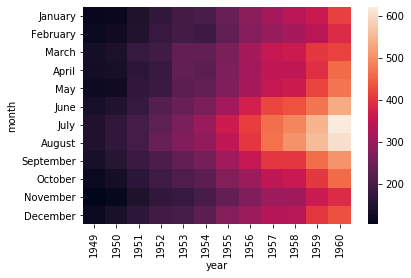

In [9]:
sns.heatmap(flight_dframe) # ヒートマップを表示

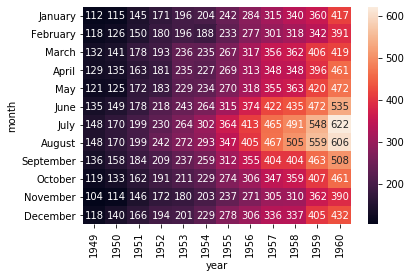

In [10]:
sns.heatmap(flight_dframe, annot=True, fmt='d') # ヒートマップに数値を重ねて表示する

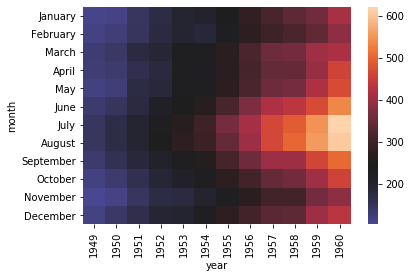

In [11]:
sns.heatmap(flight_dframe, center=flight_dframe.loc['January',1955]) # 中心を決めて色を変える

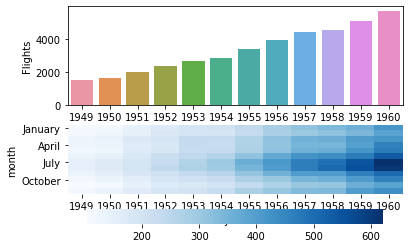

In [13]:
f, (axis1, axis2) = plt.subplots(2, 1)
yearly_flight = flight_dframe.sum()

years = pd.Series(yearly_flight.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flight.values)
flights = pd.DataFrame(flights)

year_dframe = pd.concat((years, flights), axis=1)
year_dframe.columns = ['Year', 'Flights']

sns.barplot('Year', y='Flights', data=year_dframe, ax=axis1)
sns.heatmap(flight_dframe, cmap='Blues', ax=axis2, cbar_kws={'orientation':'horizontal'})

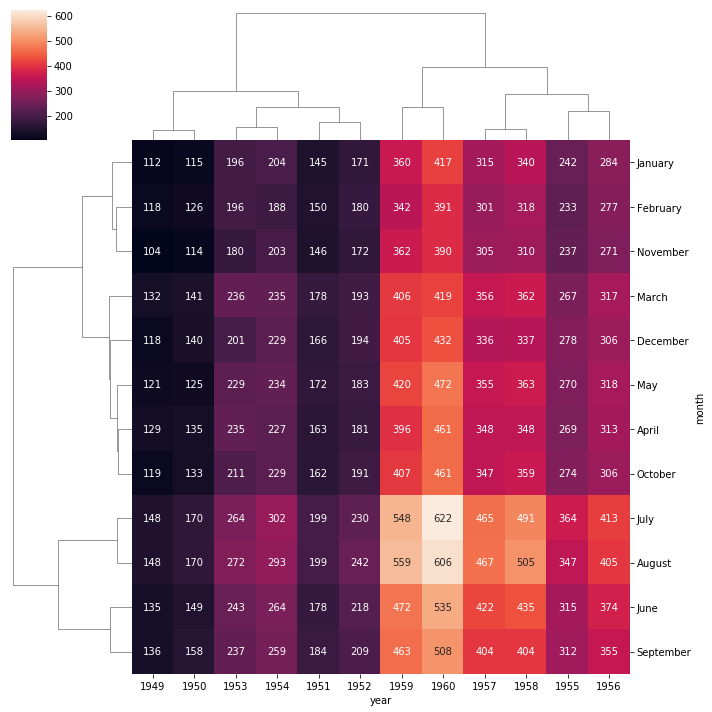

In [15]:
sns.clustermap(flight_dframe, annot=True, fmt='d')  # クラスター化されたヒートマップを描画

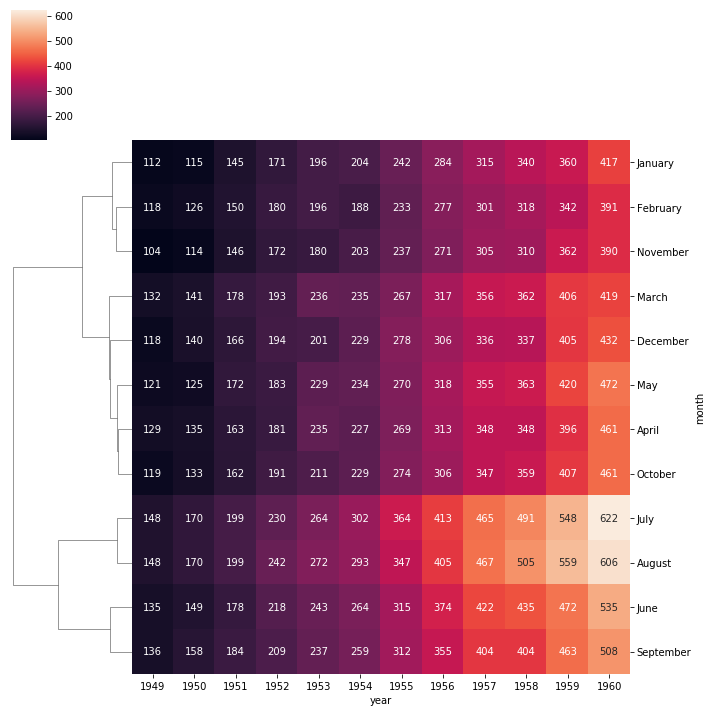

In [18]:
sns.clustermap(flight_dframe, col_cluster=False, annot=True, fmt='d') # 列方向のクラスタリングは行わない

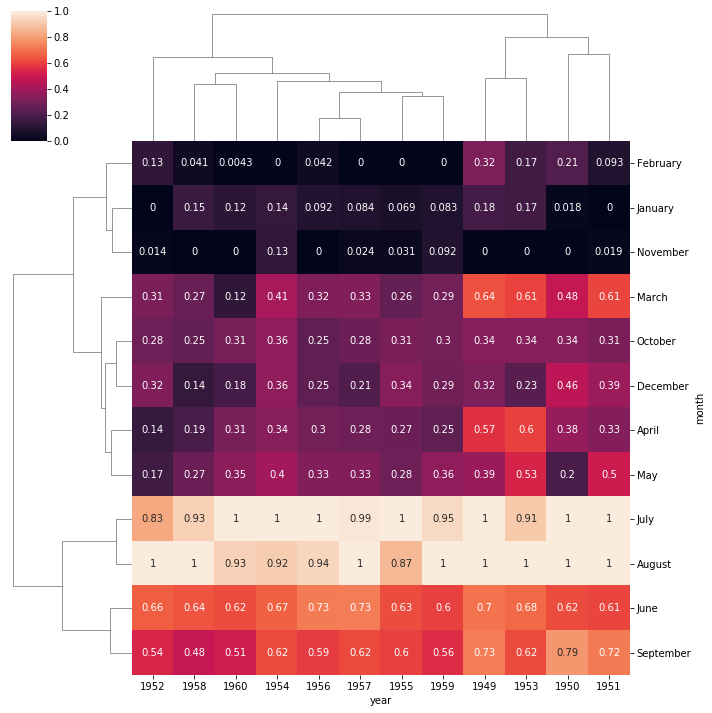

In [21]:
sns.clustermap(flight_dframe, standard_scale=1, annot=True) # 列方向に標準化。年代ごとの差異が吸収された

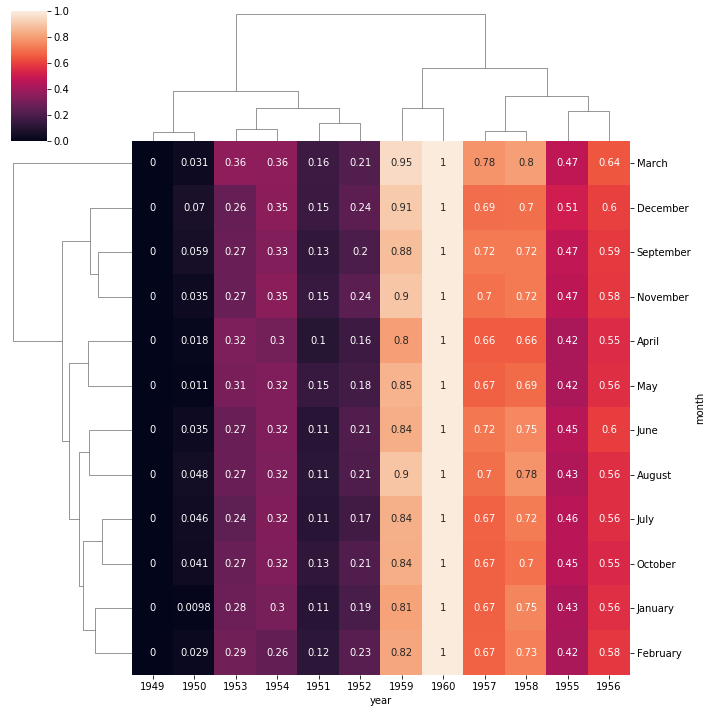

In [23]:
sns.clustermap(flight_dframe, standard_scale=0, annot=True) # 行方向に標準化。月ごとの差異が吸収された

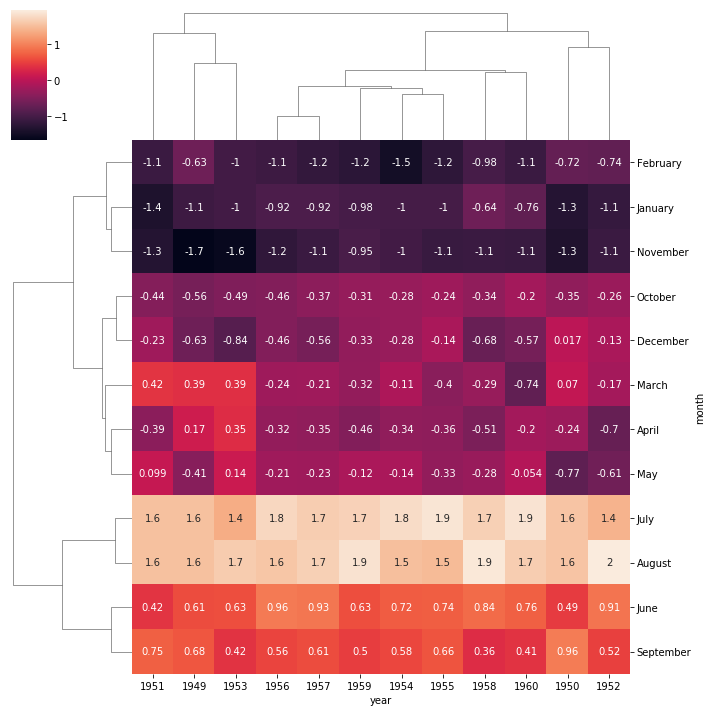

In [24]:
sns.clustermap(flight_dframe, z_score=1, annot=True) # データを平均値を引いて標準偏差で割る